In [63]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
from matplotlib import pyplot


In [3]:
df = pd.read_pickle("../output/NYCHA_Electricity_2010_to_2018_df_prorated_kwh_imputed")

In [56]:
mask = df.Gap_Type == 'No Gap'

Find an account with no missing data for all the years.

In [61]:
df[mask].groupby('Building_Meter').count().reset_index()[['Building_Meter', 'Month']].sort_values(by = 'Month', ascending = False).Month.value_counts().sort_index()

2       98
3       44
4       46
5       52
6      114
7       29
8       71
9       54
10      21
11      20
12      15
13      34
14      28
15       7
16      17
17      18
18      36
19      15
20      17
21       8
22      49
23      12
24      16
25      18
26       7
27      20
28      23
29      12
30       7
31      10
      ... 
74      13
75      20
76      78
77      58
78      29
79      32
80      50
81      62
82      26
83      27
84      19
85      44
86      54
87      23
88      62
89      33
90      35
91      46
92      33
93      68
94      41
95      69
96      45
97      88
98      39
99      91
100     32
101     61
102     14
103     27
Name: Month, Length: 102, dtype: int64

In [17]:
df.head()

,Building_Meter,Month,Month_Type,Month_#_Days,Prorated_Days,Gap_Days,Gap_Type,Prorated_KWH,Imputed_KWH
0,165.0 - BLD 04_99273488,2009-12-01,First_Month,31,9.0,0.0,No Gap,19694.117647,67835.294118
1,165.0 - BLD 04_99273488,2010-01-01,Month_In_The_Middle,31,31.0,0.0,No Gap,68283.025210,68283.025210
2,165.0 - BLD 04_99273488,2010-02-01,Month_In_The_Middle,28,28.0,0.0,No Gap,61071.133005,61071.133005
3,165.0 - BLD 04_99273488,2010-03-01,Month_In_The_Middle,31,31.0,0.0,No Gap,58011.118077,58011.118077
4,165.0 - BLD 04_99273488,2010-04-01,Month_In_The_Middle,30,30.0,0.0,No Gap,55164.054336,55164.054336


In [18]:
mask = df.Building_Meter == '165.0 - BLD 04_99273488'

series = df.loc[mask, ['Month', 'Imputed_KWH']]

series = series.set_index('Month')

In [50]:
result = seasonal_decompose(series, model='additive')

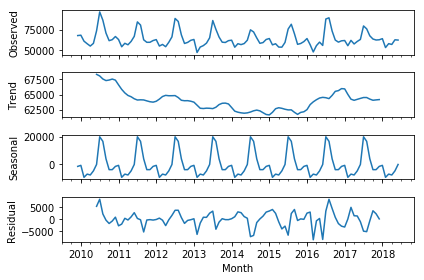

In [51]:
result.plot()
pyplot.show()

In [52]:
result = seasonal_decompose(series, model='multiplicative')

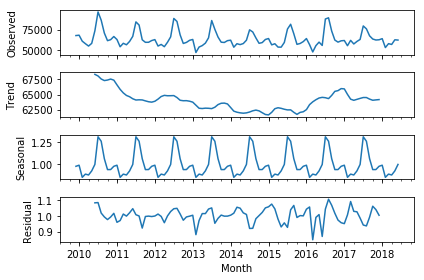

In [53]:
result.plot()
pyplot.show()